<a href="https://colab.research.google.com/github/nipa010/Machine-Learning/blob/main/Order_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('/content/Orders-Analysis-Task.csv')



# first 5 rows in the dataframe
data.head()



FileNotFoundError: [Errno 2] No such file or directory: '/content/Orders-Analysis-Task.csv'

In [ ]:
#Normalize the data

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['discounts', 'ordered_item_quantity']

# Apply the scaler to the selected columns using .loc for label-based indexing
data.loc[:, columns_to_normalize] = scaler.fit_transform(data.loc[:, columns_to_normalize])

# Display the normalized dataset
print("\nNormalized dataset:\n", data)


Normalized dataset:
       product_title product_type variant_title               variant_sku  \
161             AYN    Product P   31 / A / 34  03-C8D-42C-ACD-3-3BD9B5C   
162             WHX    Product A  38 / C / FtO  28-1F9-816-C17-5-91FC861   
163             WHX    Product A  36 / A / FtO  F9-AC7-42B-A11-B-24E0431   
164             WHX    Product A  36 / B / FtO  FF-21F-BB2-6D1-F-B55CB55   
165             VXH    Product A   34 / B / 33  FC-549-B5B-C66-D-994E8E8   
...             ...          ...           ...                       ...   
69207           NMA    Product E  30 / B / FtO  B1-1AA-407-B7B-E-9928B96   
69208           YQX    Product F   28 / A / 28  88-1F7-883-F68-4-E4C0CAB   
69209           NMA    Product F  32 / A / FtO  C1-07C-3A6-961-6-563BC2B   
69210           NMA    Product F  33 / B / FtO  64-5AF-916-0A2-4-A7A1F9D   
69211           NMA    Product F  30 / A / FtO  10-79B-CF6-623-1-1A06E44   

       variant_id  customer_id        order_id         day  net_q

In [ ]:
# remove outlier
from scipy import stats

# Assuming 'data' is your DataFrame with potential string columns
# Select only numerical columns for z-score calculation
numerical_data = data.select_dtypes(include=np.number)

z_scores = stats.zscore(numerical_data)
# Filter the original DataFrame based on z-scores of numerical columns
data = data[(np.abs(z_scores) < 3).all(axis=1)]

In [ ]:
#Choosing the Annual Income Column & Spending Score column
X = data.iloc[:,[10,16]].values
print(X)


[[0.02218182 1.        ]
 [0.02254545 1.        ]
 [0.02254545 1.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

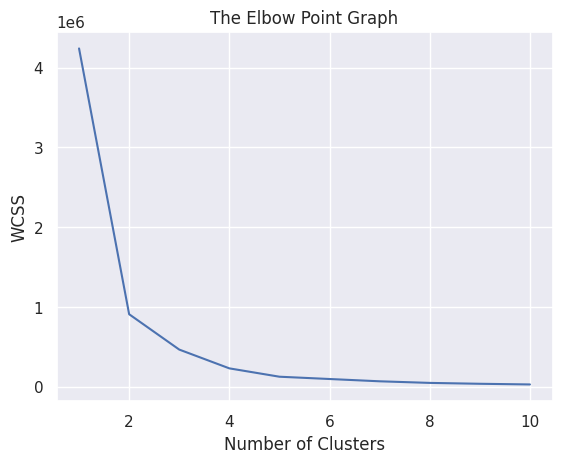

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [1]:
 # Assuming you determined the optimal k to be 5 from the elbow method
optimal_k = 4  # Replace 5 with the actual optimal k you found

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)  # Use X, the data you prepared for clustering
print(Y)


NameError: name 'KMeans' is not defined

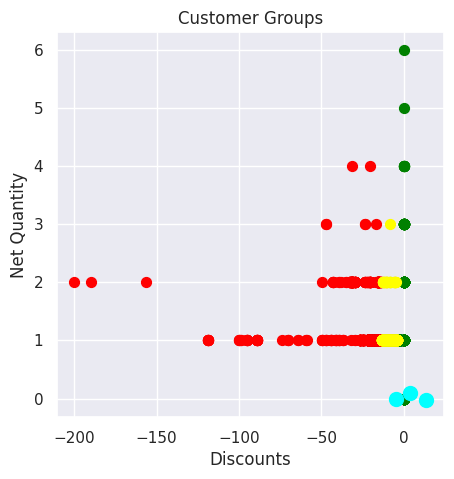

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Discounts')
plt.ylabel('Net Quantity')
plt.show()

In [ ]:
# Predict cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8401959608584141
